<a href="https://colab.research.google.com/github/surikata3k/ia_celsius2farenheit/blob/main/zalando2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
dades, metadades = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.JF2KS1_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.JF2KS1_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
metadades

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

In [5]:
dades_entrenament, dades_prova = dades['train'], dades['test']


In [6]:
nom_categories = metadades.features['label'].names


In [7]:
nom_categories

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
# Normalitzar les dades. Obtenir dades entre els valors 0.0 i 1.0 i no entre 0-255
def normalitzar (imatges, etiquetes):
    imatges = tf.cast (imatges, tf.float32)
    imatges = imatges / 255    # Divisió amb decimals per tal d'obtenir els valors entre 0 i 1
    return imatges, etiquetes



In [9]:
# Ara passem totes les dades d'entrenament i proves per la nostra funció de normalització

dades_entrenament = dades_entrenament.map(normalitzar)
dades_prova = dades_prova.map(normalitzar)

In [10]:
# Ficar les variables a memòria cau per tal de millorar el rendiment

dades_entrenament = dades_entrenament.cache()
dades_prova = dades_prova.cache()

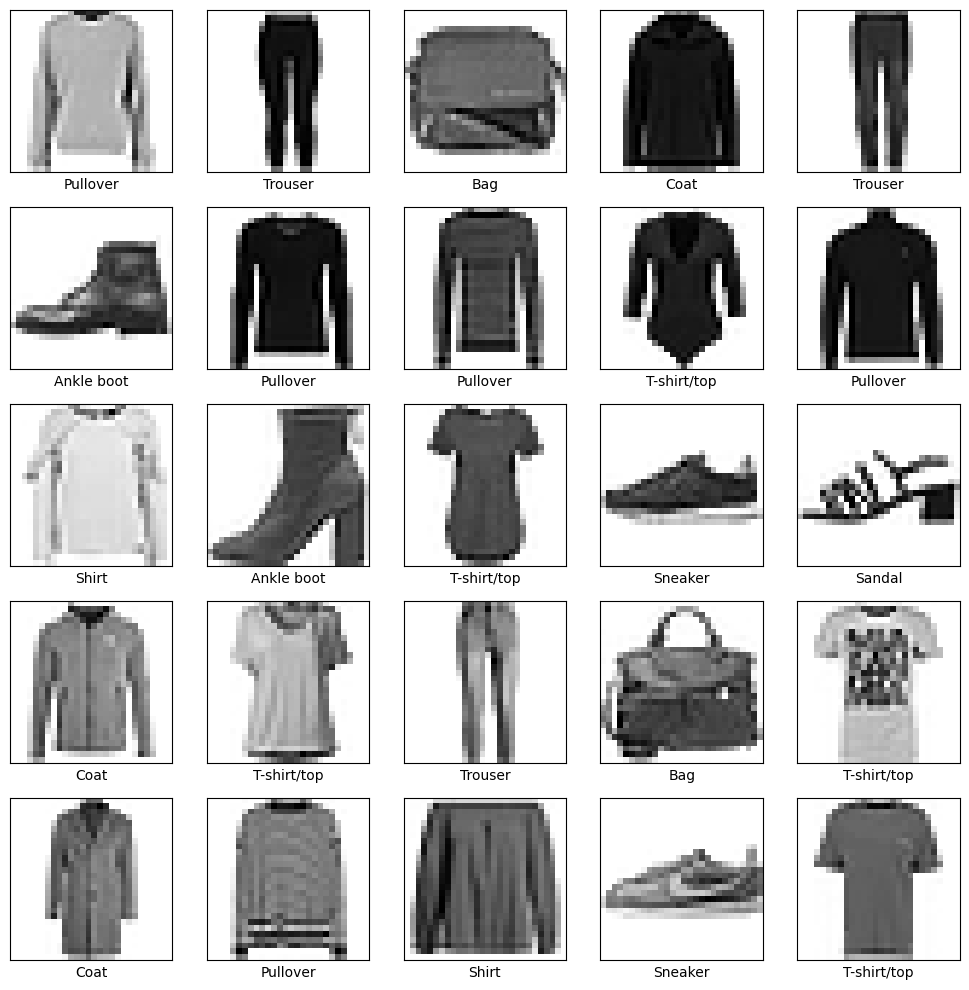

In [11]:
# Mostrar les primeres 25 imatges i comprovar si les ha etiquetat correctament

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, (imatge, etiqueta) in enumerate(dades_entrenament.take(25)):
    imatge = imatge.numpy().reshape((28, 28))  # Redimensionar la imatge a 28x28 píxels
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imatge, cmap=plt.cm.binary)  # Mostrar la imatge en escala de grisos
    plt.grid(False)
    plt.xlabel(nom_categories[etiqueta])  # Mostrar l'etiqueta de la imatge

plt.tight_layout()  # Ajustar el disseny per evitar superposicions
plt.show()  # Mostrar totes les imatges juntes


In [12]:
# Creant el model

model = tf.keras.Sequential([
    # Definim explícitament la capa d'entrada
    tf.keras.Input(shape=(28, 28, 1)),  # Forma de les imatges: 28x28 píxels, 1 canal (escala de grisos)

    # Capa Flatten: transforma la imatge 28x28x1 en un vector de 784 elements
    tf.keras.layers.Flatten(),

    # Primera capa oculta de 50 neurones amb activació ReLU
    tf.keras.layers.Dense(50, activation='relu'),

    # Segona capa oculta de 50 neurones amb activació ReLU
    tf.keras.layers.Dense(50, activation='relu'),

    # Capa de sortida amb 10 neurones (per a 10 classes) i activació softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(
    optimizer='adam',
    # Funció de pèrdua utilitzada en problemes de classificació multiclasse amb etiquetes enters
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']  # Mètrica per avaluar el rendiment del model (precisió)
)

In [14]:
MIDA_BLOC = 32  # Defineix la mida del lot (batch size) per a l'entrenament

# Configura les dades d'entrenament per ser agafades de manera aleatòria i en lots de 32
dades_entrenament = dades_entrenament.shuffle(60000).batch(MIDA_BLOC)

# Configura les dades de prova en lots de 32 (sense shuffle, ja que és el conjunt de validació)
dades_prova = dades_prova.batch(MIDA_BLOC)

In [15]:
# Anem a entrenar la nostra xarxa neuronal. Agafem el model d'entrenament fit
# Li donarem 5 voltes (epochs) a les dades d'entrenament

import math

historial = model.fit(
    dades_entrenament,
    epochs=5,
    steps_per_epoch=math.ceil(60000/MIDA_BLOC)  # Calcula el nombre de lots per època
)
print("Model entrenat!!")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7571 - loss: 0.7030
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8607 - loss: 0.3899
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3468
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8796 - loss: 0.3285
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8817 - loss: 0.3172
Model entrenat!!


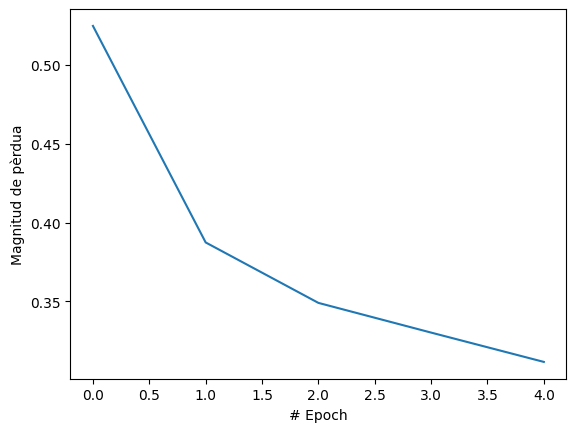

In [17]:
plt.xlabel("# Epoch")
plt.ylabel('Magnitud de pèrdua')
plt.plot(historial.history["loss"])

In [20]:
# Pintar una graella per poder fer les prediccions. Marcar si és correcta (blau) o incorrecta (vermella)
import numpy as np
import matplotlib.pyplot as plt

# Obtenir un lot de dades de prova
for images_prova, etiquetes_prova in dades_prova.take(1):
    images_prova = images_prova.numpy()
    etiquetes_prova = etiquetes_prova.numpy()
    prediccions = model.predict(images_prova)

def dibuixar_imatge(i, arr_prediccions, etiquetes_reals, images):
    arr_prediccions, etiqueta_real, img = arr_prediccions[i], etiquetes_reals[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)  # Mostrar imatge en escala de grisos

    etiqueta_prediccio = np.argmax(arr_prediccions)
    if etiqueta_prediccio == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(
        nom_categories[etiqueta_prediccio],
        100*np.max(arr_prediccions),
        nom_categories[etiqueta_real]),
        color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


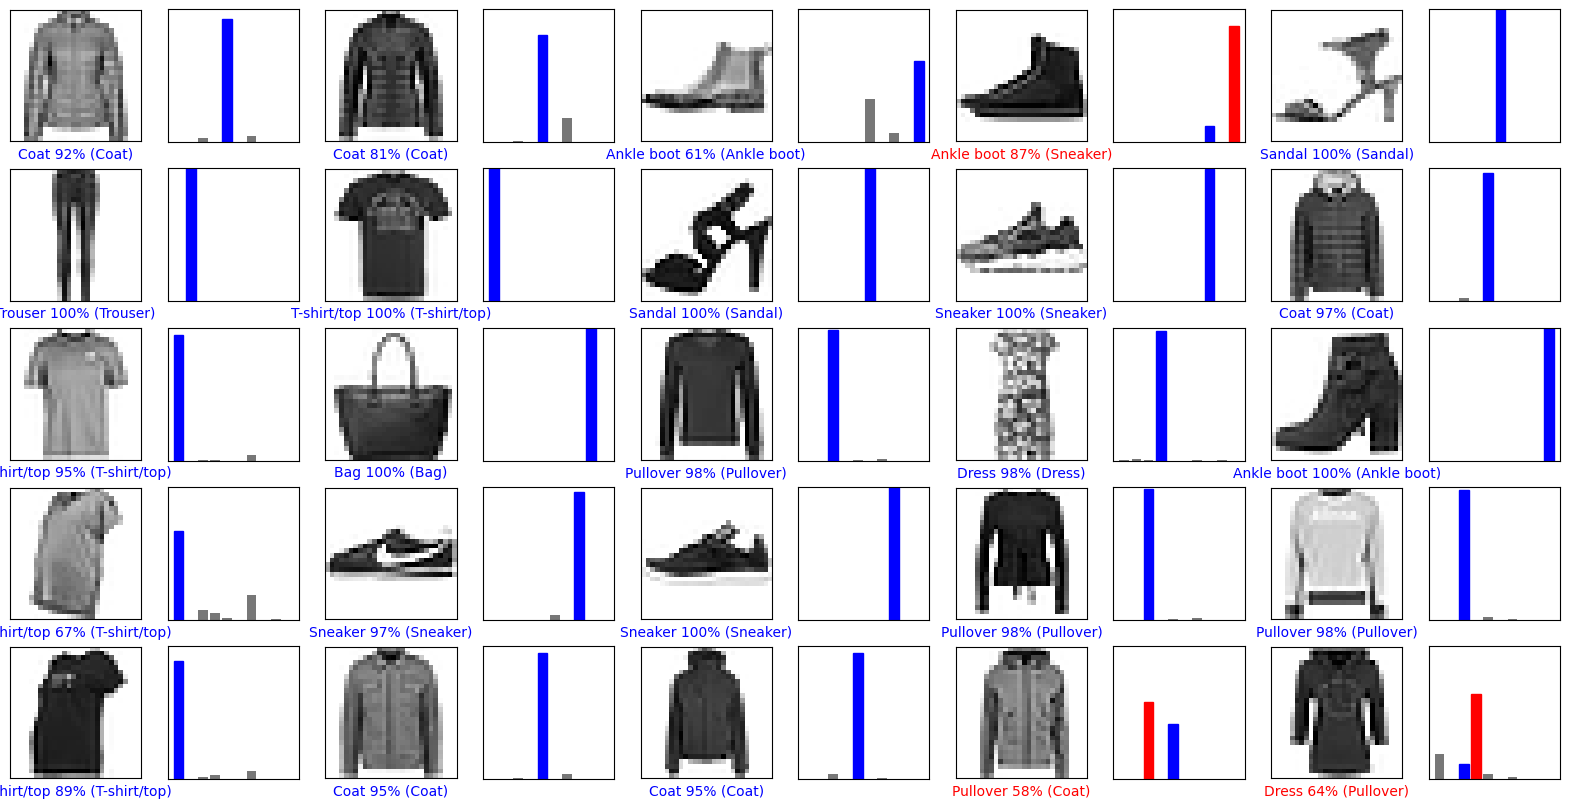

In [25]:
def dibbixar_valor_array(i, arr_predictions, etiqueta_real):
    arr_predictions, etiqueta_real = arr_predictions[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predictions, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccio = np.argmax(arr_predictions)

    grafica[etiqueta_prediccio].set_color('red')
    grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imatges = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imatges):
    plt.subplot(filas, 2*columnas, 2*i+1)
    dibuixar_imatge(i, prediccions, etiquetes_prova, images_prova)
    plt.subplot(filas, 2*columnas, 2*i+2)
    dibbixar_valor_array(i, prediccions, etiquetes_prova)

In [27]:
# Provar una única imatge i veure la predicció
imatge = images_prova[2]  # Agafem la tercera imatge del conjunt de prova (índex 2)
imatge = np.array([imatge])  # Convertim a array numpy i afegim dimensió de batch
prediccio = model.predict(imatge)  # Obtenim la predicció del model

print("Predicció: " + nom_categories[np.argmax(prediccio[0])])  # Mostrem la classe predita

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicció: Ankle boot
